## Section 1. Libraries

In [1]:
import numpy
import matplotlib.pyplot
import sys
import os
import torch
import yaml
import pandas

sys.path.append(os.path.join(sys.path[0], '../'))

from src.proposed_method.explainable_NN import explainable_NN
from src.utils.load_data import load_data
from src.utils.utils_proposed_method import search_counterfactuals
from src.utils.metrics_functions import compute_metrics

from src.cost_policy.cost_policy_for_datasets import funcion_costes_numpy, funcion_costes_torch
%load_ext autoreload
%autoreload 2

## Section 2. Load params from yaml

In [2]:
with open('../conf/proposed_method_params.yaml') as f:
    params = yaml.load(f, Loader=yaml.loader.SafeLoader)

########## Paths ##########
path_save_counterfactual = "../results/re-computing_counterfactual_explanations/"
path_precomputed_counterfactuals = "../results/pre-computed_counterfactual_explanations/"
path_pretrained_model = "../data/pretrained_clasification_models/"
path_data = "../data/datasets/"
###########################

## Compute the metrics and results table from pre-searched counterfactuals

If you want to compute the results of the RE-computed counterfactuals you must to change the variable 'use_precomputed_counterfactuals' from True to False.

***[WARNING]***: This just modify the path where to load the counterfactuals, but the folder "re-computed_counterfactual_explanations" is empty by default. To re-compute the experiments you must re-execute the desired experiments with the **Section 3** of this notebook.

Also if necesary, you can comment some names in the variables 'dataset_name_list' and 'model_name_list' in case you only want to compute the metrics for a specific combination of dataset and/or explanation method.

In [3]:
########### Modificable params ###########
dataset_name_list = [  # Comment any dataset to not compute the metrics of its counterfactuals.
                     'MKT',
                     'TCC',
                     'CCF',
                     'HMEQ',
                     'CS1',
                     'CS2',
                     ]
method_name_list = [  # Comment any method to not compute the metrics of its counterfactuals.
                    'Proposed',
                    'Alibi_proto',
                    'Alibi_cem',
                    'GRACE'
                    ]
use_precomputed_counterfactuals = True  # Change to False for compute metrics of RE-computed counterfactuals.
verbose = False
##########################################

if use_precomputed_counterfactuals:
    # To compute the resulting metrics of the PRE-computed counterfactuals
    load_experiments_path = path_precomputed_counterfactuals
else:
    # To compute the resulting metrics of the RE-computed counterfactuals
    load_experiments_path = path_save_counterfactual

final_results = compute_metrics(method_name_list=method_name_list,
                                dataset_name_list=dataset_name_list,
                                load_experiments_path=load_experiments_path,
                                verbose=verbose)

global_mean_distance = final_results['global_mean_distance']
global_succeed_ratio = final_results['global_succeed_ratio']
global_counter_savings = final_results['global_counter_savings']
global_results_dict = final_results['global_results_dict']

print("\n\n[Table Results]: Counter Savings")
display(pandas.DataFrame(global_counter_savings).transpose())

print("\n\n[Table Results]: Success Ratio")
display(pandas.DataFrame(global_succeed_ratio).transpose())

print("\n\n[Table Results]: Mean Distance")
display(pandas.DataFrame(global_mean_distance).transpose())



[Table Results]: Counter Savings


,MKT,TCC,CCF,HMEQ,CS1,CS2
Proposed,68.77,72.55,99.60,85.03,98.18,90.97
Alibi_proto,59.44,57.87,68.98,65.76,65.03,54.54
Alibi_cem,54.80,63.19,55.91,65.63,62.54,54.10
GRACE,53.53,57.48,65.02,64.14,67.79,53.36




[Table Results]: Success Ratio


,MKT,TCC,CCF,HMEQ,CS1,CS2
Proposed,82.73,100.00,99.19,99.63,92.63,81.36
Alibi_proto,96.28,100.00,100.00,95.15,95.39,100.00
Alibi_cem,80.93,100.00,34.15,80.22,87.01,100.00
GRACE,76.81,3.39,52.85,84.70,85.93,98.97




[Table Results]: Mean Distance


,MKT,TCC,CCF,HMEQ,CS1,CS2
Proposed,2.33,2.68,7.99,0.57,1.02,9.77
Alibi_proto,2.06,0.82,9.56,0.98,0.33,0.46
Alibi_cem,0.61,0.92,0.99,0.92,0.45,0.44
GRACE,1.24,0.30,3.78,3.15,28.76,0.46


## [Optional]  Section 3. Reproduce the counterfactual searching over all datasets

**[Warning]** This may take a high amount of time depending on the dataset. An aproximation of the duration of the search of each dataset is:
- HMEQ:
- TCC: 4 min
- MKT:
- CS1:
- CS2:

**[Important]** Due to the execution times, we carefully recoment to reproduce the experiments one by one. This can be perform just by only leave one dataset name uncommented in the 'list_datasets' variable in the next cell.



__________________________________________________
Searching Counterfactuals on MKT dataset

[Process] START data loading
[Data Info] Imbalance ratio (IR) = P0/P1 = N0/N1 || total: 6.9	 || tr: 6.9	 || ts: 6.9
[Data Info] mean(1/Qc = (c01 - c11)/(c10 - c00)) || total: 1.0305924488151709e+17	 || tr: 1.0283312911879746e+17	 || ts: 1.03737568325348e+17
[Data Info] shape: 32 dims for 37931 samples || Train/Test = 75/25 [%]
[Process] DONE data loading


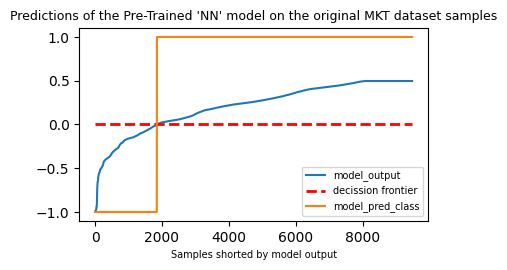


[Process] START counterfactual search


100%|██████████| 2/2 [00:01<00:00,  1.59it/s]


[Process] DONE counterfactual search
__________________________________________________


__________________________________________________
Searching Counterfactuals on TCC dataset

[Process] START data loading
[Data Info] Imbalance ratio (IR) = P0/P1 = N0/N1 || total: 2.8	 || tr: 2.8	 || ts: 2.8
[Data Info] mean(1/Qc = (c01 - c11)/(c10 - c00)) || total: 4.0	 || tr: 4.0	 || ts: 4.0
[Data Info] shape: 26 dims for 7043 samples || Train/Test = 75/25 [%]
[Process] DONE data loading


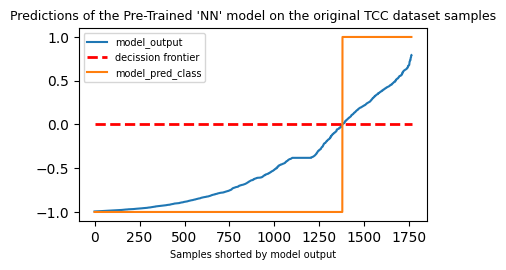


[Process] START counterfactual search


100%|██████████| 2/2 [00:01<00:00,  1.48it/s]


[Process] DONE counterfactual search
__________________________________________________


__________________________________________________
Searching Counterfactuals on CCF dataset

[Process] START data loading
[Data Info] Imbalance ratio (IR) = P0/P1 = N0/N1 || total: 57.8	 || tr: 57.8	 || ts: 57.8
[Data Info] mean(1/Qc = (c01 - c11)/(c10 - c00)) || total: 14.9	 || tr: 14.9	 || ts: 14.9
[Data Info] shape: 29 dims for 28922 samples || Train/Test = 75/25 [%]
[Process] DONE data loading


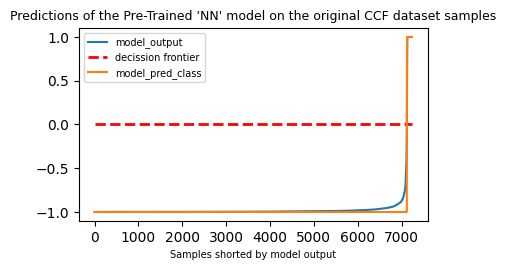


[Process] START counterfactual search


100%|██████████| 2/2 [00:01<00:00,  1.50it/s]


[Process] DONE counterfactual search
__________________________________________________


__________________________________________________
Searching Counterfactuals on HMEQ dataset

[Process] START data loading
[Data Info] Imbalance ratio (IR) = P0/P1 = N0/N1 || total: 4.0	 || tr: 4.0	 || ts: 4.0
[Data Info] mean(1/Qc = (c01 - c11)/(c10 - c00)) || total: 5.0	 || tr: 5.0	 || ts: 5.0
[Data Info] shape: 20 dims for 5960 samples || Train/Test = 75/25 [%]
[Process] DONE data loading


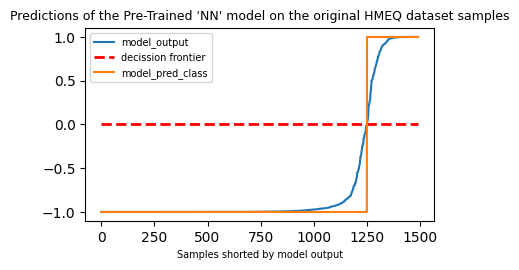


[Process] START counterfactual search


100%|██████████| 2/2 [00:06<00:00,  3.33s/it]


[Process] DONE counterfactual search
__________________________________________________


__________________________________________________
Searching Counterfactuals on CS1 dataset

[Process] START data loading
[Data Info] Imbalance ratio (IR) = P0/P1 = N0/N1 || total: 13.8	 || tr: 13.8	 || ts: 13.8
[Data Info] mean(1/Qc = (c01 - c11)/(c10 - c00)) || total: 13.8	 || tr: 13.8	 || ts: 13.8
[Data Info] shape: 10 dims for 112915 samples || Train/Test = 75/25 [%]
[Process] DONE data loading


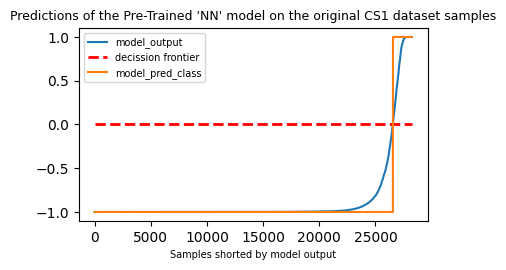


[Process] START counterfactual search


100%|██████████| 2/2 [00:03<00:00,  1.95s/it]


[Process] DONE counterfactual search
__________________________________________________


__________________________________________________
Searching Counterfactuals on CS2 dataset

[Process] START data loading
[Data Info] Imbalance ratio (IR) = P0/P1 = N0/N1 || total: 4.0	 || tr: 4.0	 || ts: 4.0
[Data Info] mean(1/Qc = (c01 - c11)/(c10 - c00)) || total: 6.37027030253223e+17	 || tr: 6.362073683868095e+17	 || ts: 6.394858474576271e+17
[Data Info] shape: 34 dims for 38938 samples || Train/Test = 75/25 [%]
[Process] DONE data loading


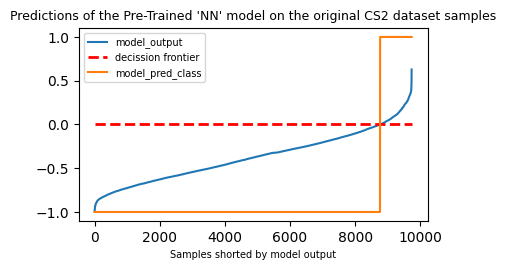


[Process] START counterfactual search


100%|██████████| 2/2 [00:11<00:00,  5.58s/it]

[Process] DONE counterfactual search
__________________________________________________


In [4]:
########### Modificable params ###########
dataset_name_list = [  # Comment any dataset to not compute the metrics of its counterfactuals.
                     'MKT',
                     'TCC',
                     'CCF',
                     'HMEQ',
                     'CS1',
                     'CS2',
                     ]
save_results = True
verbose = 1  # [0: no prints; 1: high level information; 2: full detail]. [Warning] there is a level 3, but it saturates the output console
             # so if necesary, just use it for a single sample on a single dataset.
figure = False  # [Warning]: This params displays a set of charts by each sample of each dataset.
#                 Just activate then executing with a small amount of samples on a single dataset.
plot_resume_of_dataset_outputs = True
small_test = True
##########################################

for name_dataset in dataset_name_list:

    print("\n")
    print("__________________________________________________")
    print(f"Searching Counterfactuals on {name_dataset} dataset")
    loaded_dataset = load_data(name_dataset=name_dataset,
                               path_data=path_data,
                               verbose=verbose)

    ############ Create explainable model ############
    # Load pretrained NN weights
    file_load_NN_weights = f"{name_dataset}_NN_weights.txt"
    direccion_resultado = path_pretrained_model + file_load_NN_weights
    weights_pretrained_model = torch.load(direccion_resultado)

    # Initializing the NN model with the pretrained NN params
    tensor_x_ts = loaded_dataset['tensor_x_ts']
    explainable_NN_model = None
    explainable_NN_model = explainable_NN(name_dataset=name_dataset, 
                                        pretrained_weights=weights_pretrained_model,
                                        input_size=tensor_x_ts.shape[1],
                                        hidden_size=params[name_dataset]['NN']
                                        )
    ##################################################

    if plot_resume_of_dataset_outputs:
        prob_pred_orig_ts = explainable_NN_model.eval_samples(tensor_x_ts).detach().numpy().flatten()
        y_pred_orig_ts = explainable_NN_model.predict_class(x_input=tensor_x_ts).astype(int)

        index_sort = prob_pred_orig_ts.argsort()
        x_max = y_pred_orig_ts.sum()
        matplotlib.pyplot.figure(figsize=(4.5,2.5))
        matplotlib.pyplot.plot(prob_pred_orig_ts[index_sort], label='model_output')
        matplotlib.pyplot.hlines(y=0.0, xmin=0, xmax=len(y_pred_orig_ts), linewidth=2, colors='r', linestyles='--', label='decission frontier')
        matplotlib.pyplot.plot(y_pred_orig_ts[index_sort], label='model_pred_class')
        matplotlib.pyplot.xlabel('Samples shorted by model output', fontsize=7)
        matplotlib.pyplot.title(f"Predictions of the Pre-Trained 'NN' model on the original {name_dataset} dataset samples", fontsize=9)
        matplotlib.pyplot.legend(fontsize=7)
        matplotlib.pyplot.show()

    results = search_counterfactuals(name_dataset=name_dataset,
                                     explainable_NN_model=explainable_NN_model,
                                     loaded_dataset=loaded_dataset,
                                     params=params,
                                     figure=figure,
                                     verbose=verbose,
                                     small_test=small_test)
    print("__________________________________________________")
    if save_results:
        file_save_counterfactuals = f"counterfactual_results_{name_dataset}"
        direccion_resultado  = path_save_counterfactual + "Proposed/" + file_save_counterfactuals
        numpy.save(direccion_resultado, results, allow_pickle=True)


In [5]:
!pip show ipykernel

Name: ipykernel
Version: 6.15.0
Summary: IPython Kernel for Jupyter
Home-page: 
Author: 
Author-email: IPython Development Team <ipython-dev@scipy.org>
License: # Licensing terms
        
        This project is licensed under the terms of the Modified BSD License
        (also known as New or Revised or 3-Clause BSD), as follows:
        
        - Copyright (c) 2015, IPython Development Team
        
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        Redistributions of source code must retain the above copyright notice, this
        list of conditions and the following disclaimer.
        
        Redistributions in binary form must reproduce the above copyright notice, this
        list of conditions and the following disclaimer in the documentation and/or
        other materials provided with the distribution.
        
  